# SETUP, LOADING DATASET
- - -

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')

In [2]:
filepath_train = "./../../../data/titanic/train.csv"
filepath_test = "./../../../data/titanic/test.csv"

In [3]:
train_raw = pd.read_csv(filepath_or_buffer=filepath_train)
train_raw.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Data Description

- Variable : Definition
    - survival: Survival
    - pclass : Ticket class
    - sex : Sex
    - Age : Age in years
    - sibsp : of siblings / spouses
    - parch : of parents / children
    - ticket : Ticket number
    - fare : Passenger fare
    - cabin : Cabin number
    - embarked : Port of Embarkation(C - Cherbourg, Q - Queenstown, S - Southampton)
    
    
    
- Variable : Dtype
    - survival: categorical (0: No, 1: Yes)
    - pclass : categorical
    - sex : categorical
    - Age : numeric - discrete
    - sibsp : numeric - discrete
    - parch : numeric - discrete
    - ticket : categorical
    - fare : numeric - continuous
    - cabin : categorical
    - embarked : categorical
    
> sex, pclass, fare 와 survived 사이에는 명확한 상관관계가 있는 것으로 보인다.

> ticket, name, cabin, embarked는 어떻게 분석해야 하는가.

In [4]:
# 데이터타입 확인하기

train_raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train_corr = train_raw.corr()
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
# column 별 value_counts() 파악하기

for attr in list(train_raw.columns):

    value_count = np.unique(train_raw[attr])
    value_length = len(value_count)
    
    print("Column %s | Count %d" % (attr, value_length))

    if value_length <= 50:
        print(value_count)
    
    print("-" * 100)

Column PassengerId | Count 891
----------------------------------------------------------------------------------------------------
Column Survived | Count 2
[0 1]
----------------------------------------------------------------------------------------------------
Column Pclass | Count 3
[1 2 3]
----------------------------------------------------------------------------------------------------
Column Name | Count 891
----------------------------------------------------------------------------------------------------
Column Sex | Count 2
['female' 'male']
----------------------------------------------------------------------------------------------------
Column Age | Count 265
----------------------------------------------------------------------------------------------------
Column SibSp | Count 7
[0 1 2 3 4 5 8]
----------------------------------------------------------------------------------------------------
Column Parch | Count 7
[0 1 2 3 4 5 6]
----------------------------------

TypeError: '<' not supported between instances of 'str' and 'float'

In [8]:
# NaN Value

train_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 종속변수

In [9]:
# making train_x, train_y using train_raw.

train_x = train_raw.iloc[:, 2:].copy()
train_y = train_raw.iloc[:, 1:2].copy()

[]

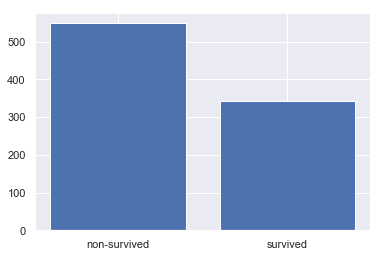

In [16]:
# x = train_y.Survived.value_counts().index
x = ['non-survived', 'survived']
y = train_y.Survived.value_counts().values

plt.bar(x, y)
plt.plot()

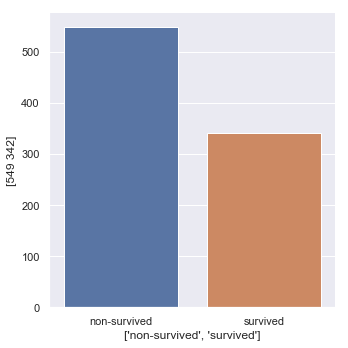

In [17]:
sns.catplot(x=x, y=y, kind='bar', data=train_y)

In [21]:
train_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

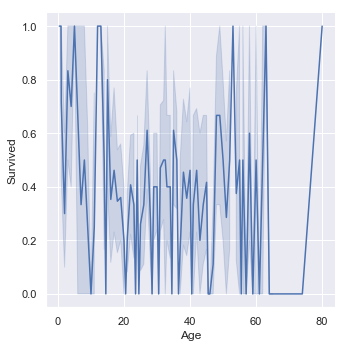

In [23]:
sns.relplot(x='Age', y='Survived', kind='line', data=train_raw)

### Categorical Variable - Dependent Variable

```
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
```

> Sex, Embarked 와 Survived 사이의 경향성 분석

In [26]:
train_x.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
train_cat = train_x[['Sex', 'Embarked']]
train_dummies = pd.get_dummies(data=train_cat)
train_dummies.tail()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0
890,0,1,0,1,0


In [35]:
train_test = pd.concat([train_y, train_dummies], axis=1)
train_test.tail()

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
886,0,0,1,0,0,1
887,1,1,0,0,0,1
888,0,1,0,0,0,1
889,1,0,1,1,0,0
890,0,0,1,0,1,0


In [36]:
train_test.corr()

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,0.543351,-0.543351,0.168240,0.003650,-0.155660
Sex_female,0.543351,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.074115,-0.074115,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,-0.125722,0.125722,-0.778359,-0.496624,1.000000


# Preprocessing
- - -

# Modeling
- - -

# Validation Performance
- - -